In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [3]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))



3198
3198
3198


In [4]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))


In [5]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

In [6]:
print(returns_mat)

[[  0.63191153   1.88216039  12.43869817]
 [  0.22566719 -11.24497992 -19.23076923]
 [ -1.90895742  18.37104072  32.3024055 ]
 ...
 [ -2.41629595   4.63576159  -0.11389522]
 [  0.26872691  -0.43816943  -0.40723245]
 [ -0.35893754  -0.4400978   -0.31076219]]


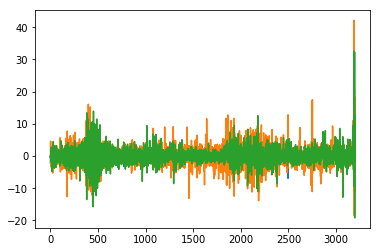

In [7]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

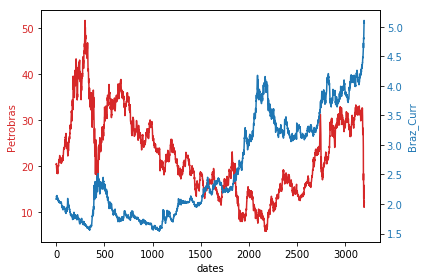

In [8]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

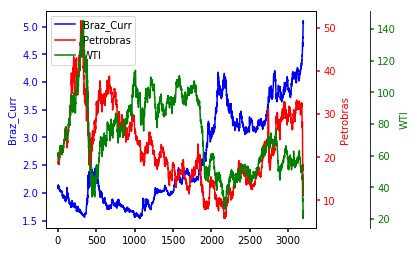

In [9]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data[:,0], "b-", label="Braz_Curr")
p2, = par1.plot(data[:,1], "r-", label="Petrobras")
p3, = par2.plot(data[:,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [10]:
lam = 0
max_iter = 300
N_states = 3

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=50,
                         n_jobs=-1)
mdl.fit(returns_mat)

HMM_GraphicalLasso(alpha=0, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=3, n_jobs=-1, repetitions=50, tol=0.0001,
                   verbose=False, warm_restart=True)

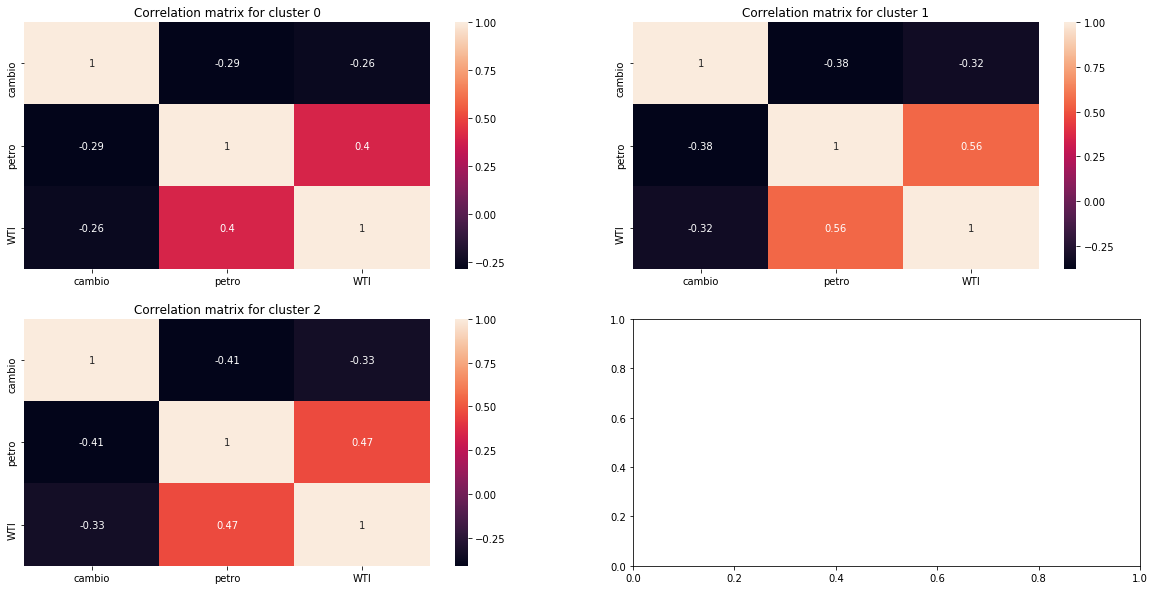

In [11]:
corr_plot(mdl.covariances_,labels=["cambio","petro","WTI"],covcorr = True)

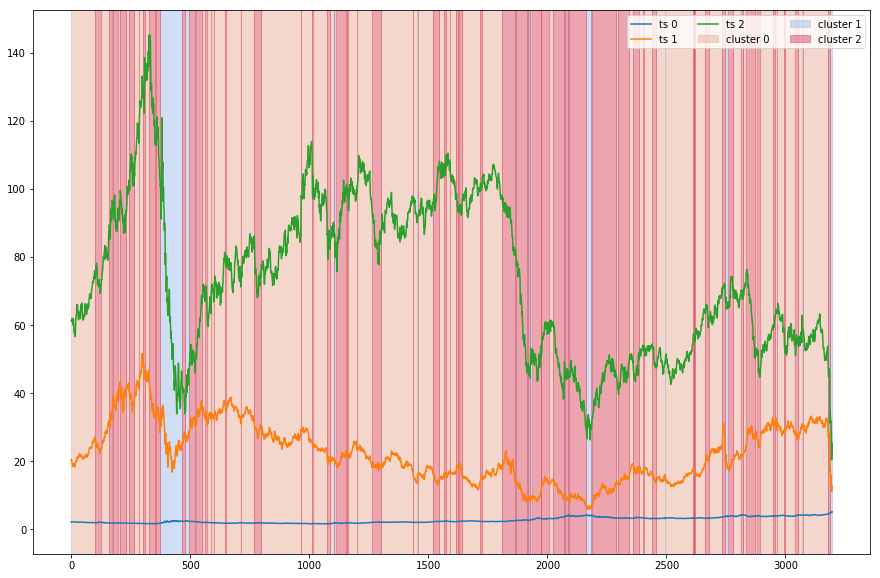

In [12]:
plot_results_cluster(data, mdl.labels_)

In [ ]:
from regain.hmm.utils_portfolio_optimization import PO_with_HMM_GMM
N_backtest = 1000
Invest_wealth = 1e5


PLpred,PLtod,PLemp = PO_with_HMM_GMM(returns_mat,
                                     data[1:,:],
                                     np.linspace(0,50,3),
                                     [2,3],
                                     N_max_mem = 1500,
                                     N_test=N_backtest,
                                     Wealth=Invest_wealth,
                                     mu_p= 0.1,
                                     OP_method = 'Min_Var_Fix_return',
                                     leverage=True)

100%|██████████| 3/3 [28:55<00:00, 578.65s/it]


Pred changed cluster
Today changed cluster
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[4.22156328 1.         1.124932  ] [ 0.05810374 -0.09063534 -0.05352282] [ 0.24528863 -0.09063534 -0.06020953]
Price difference -0.02740000000000009 N purchased pred 8074.0 N purchased today 8074.0 N purchased emp 14423.0
Price difference -0.25 N purchased pred 1504.0 N purchased today 1504.0 N purchased emp 2171.0
Price difference -1.3999999999999986 N purchased pred 1443.0 N purchased today 1443.0 N purchased emp 636.0
P&L predict [-2617.4276]
P&L today [-2617.4276]
P&L emp [-1828.3402]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[4.42563403 1.     

In [ ]:
from regain.hmm.utils_pred import reg_pred_HMM_GMM
N_pred = 30
Data = data[-2500:-865,:]
ret = returns_mat[-2500:-865,:]



ret_pred,_, Val_Pred =   reg_pred_HMM_GMM(ret,
                                   Data,
                                   [10,20,30,40,50],
                                   [2,3,4],
                                   N_retrain = N_pred,
                                   N_val = N_pred,
                                   p=2,
                                   N_test = N_pred,
                                   meth = 'viterbi',
                                   pred_meth = 'rolling',
                                   recrossval = False,
                                   CV_meth = 'reg',
                                   perc_var=True)



  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Prev 0 Var 0





 33%|███▎      | 1/3 [13:36<27:13, 816.71s/it]


 67%|██████▋   | 2/3 [1:12:29<27:11, 1631.51s/it]


100%|██████████| 3/3 [2:24:42<00:00, 2894.20s/it]


 20%|██        | 1/5 [2:24:42<9:38:50, 8682.59s/it]


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [09:46<19:33, 586.69s/it]

[1]	valid_0's l2: 0.562153	valid_0's l1: 0.653586
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.559343	valid_0's l1: 0.655842
[3]	valid_0's l2: 0.569098	valid_0's l1: 0.666782
[4]	valid_0's l2: 0.569713	valid_0's l1: 0.669104
[5]	valid_0's l2: 0.570521	valid_0's l1: 0.667256
[6]	valid_0's l2: 0.564384	valid_0's l1: 0.664465
[7]	valid_0's l2: 0.558393	valid_0's l1: 0.663308
[8]	valid_0's l2: 0.559763	valid_0's l1: 0.664884
[9]	valid_0's l2: 0.551452	valid_0's l1: 0.659913
[10]	valid_0's l2: 0.553503	valid_0's l1: 0.662133
[11]	valid_0's l2: 0.553938	valid_0's l1: 0.664137
Early stopping, best iteration is:
[1]	valid_0's l2: 0.562153	valid_0's l1: 0.653586
[1]	valid_0's l2: 4.49172	valid_0's l1: 1.77013
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 4.52076	valid_0's l1: 1.79487
[3]	valid_0's l2: 4.44367	valid_0's l1: 1.78589
[4]	valid_0's l2: 4.4111	valid_0's l1: 1.79521
[5]	valid_0's l2: 4.52695	valid_0's l1: 1.82339
[6

[17]	valid_0's l2: 4.74833	valid_0's l1: 1.89174
[18]	valid_0's l2: 4.8433	valid_0's l1: 1.90045
[19]	valid_0's l2: 4.84007	valid_0's l1: 1.89561
[20]	valid_0's l2: 4.85917	valid_0's l1: 1.88728
[21]	valid_0's l2: 4.85994	valid_0's l1: 1.88626
[22]	valid_0's l2: 4.83909	valid_0's l1: 1.87776
[23]	valid_0's l2: 4.78038	valid_0's l1: 1.86247
[24]	valid_0's l2: 4.8518	valid_0's l1: 1.8675
[25]	valid_0's l2: 4.84881	valid_0's l1: 1.87102
[26]	valid_0's l2: 4.76958	valid_0's l1: 1.85891
Early stopping, best iteration is:
[16]	valid_0's l2: 4.73491	valid_0's l1: 1.88604
[1]	valid_0's l2: 1.20144	valid_0's l1: 0.826896
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.19672	valid_0's l1: 0.829126
[3]	valid_0's l2: 1.19212	valid_0's l1: 0.833553
[4]	valid_0's l2: 1.19311	valid_0's l1: 0.831513
[5]	valid_0's l2: 1.19807	valid_0's l1: 0.836709
[6]	valid_0's l2: 1.19129	valid_0's l1: 0.837421
[7]	valid_0's l2: 1.20076	valid_0's l1: 0.84088
[8]	valid_0's l2: 1.19046	

[20]	valid_0's l2: 8.88205	valid_0's l1: 2.4658
[21]	valid_0's l2: 8.83063	valid_0's l1: 2.45455
[22]	valid_0's l2: 8.80523	valid_0's l1: 2.4557
[23]	valid_0's l2: 8.73142	valid_0's l1: 2.45139
[24]	valid_0's l2: 8.69034	valid_0's l1: 2.44361
[25]	valid_0's l2: 8.60534	valid_0's l1: 2.43477
Early stopping, best iteration is:
[15]	valid_0's l2: 8.45624	valid_0's l1: 2.42374
[1]	valid_0's l2: 1.78626	valid_0's l1: 1.06186
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 1.79944	valid_0's l1: 1.06669
[3]	valid_0's l2: 1.79993	valid_0's l1: 1.07177
[4]	valid_0's l2: 1.80767	valid_0's l1: 1.07488
[5]	valid_0's l2: 1.79716	valid_0's l1: 1.07941
[6]	valid_0's l2: 1.79635	valid_0's l1: 1.08727
[7]	valid_0's l2: 1.82993	valid_0's l1: 1.10259
[8]	valid_0's l2: 1.80381	valid_0's l1: 1.09953
[9]	valid_0's l2: 1.8221	valid_0's l1: 1.11117
[10]	valid_0's l2: 1.80188	valid_0's l1: 1.10734
[11]	valid_0's l2: 1.80526	valid_0's l1: 1.10958
Early stopping, best iteration is:

[30]	valid_0's l2: 8.09707	valid_0's l1: 2.36644
[31]	valid_0's l2: 8.07567	valid_0's l1: 2.37098
[32]	valid_0's l2: 8.02326	valid_0's l1: 2.36133
[33]	valid_0's l2: 8.02163	valid_0's l1: 2.36323
[34]	valid_0's l2: 7.99867	valid_0's l1: 2.37035
[35]	valid_0's l2: 7.99576	valid_0's l1: 2.37522
Early stopping, best iteration is:
[25]	valid_0's l2: 8.04699	valid_0's l1: 2.33424
Train on 1613 samples, validate on 10 samples
Epoch 1/50
 - 1s - loss: 0.7433 - val_loss: 0.6906
Epoch 2/50
 - 0s - loss: 0.7379 - val_loss: 0.6830
Epoch 3/50
 - 0s - loss: 0.7355 - val_loss: 0.6796
Epoch 4/50
 - 0s - loss: 0.7339 - val_loss: 0.6752
Epoch 5/50
 - 0s - loss: 0.7326 - val_loss: 0.6672
Epoch 6/50
 - 0s - loss: 0.7316 - val_loss: 0.6635
Epoch 7/50
 - 0s - loss: 0.7309 - val_loss: 0.6590
Epoch 8/50
 - 0s - loss: 0.7302 - val_loss: 0.6551
Epoch 9/50
 - 0s - loss: 0.7297 - val_loss: 0.6502
Epoch 10/50
 - 0s - loss: 0.7291 - val_loss: 0.6469
Epoch 11/50
 - 0s - loss: 0.7287 - val_loss: 0.6455
Epoch 12/50
 

 - 0s - loss: 1.4694 - val_loss: 2.1894
Epoch 50/50
 - 0s - loss: 1.4680 - val_loss: 2.1917
Train on 1614 samples, validate on 10 samples
Epoch 1/50
 - 1s - loss: 0.7461 - val_loss: 0.5558
Epoch 2/50
 - 0s - loss: 0.7396 - val_loss: 0.5527
Epoch 3/50
 - 0s - loss: 0.7371 - val_loss: 0.5487
Epoch 4/50
 - 0s - loss: 0.7357 - val_loss: 0.5444
Epoch 5/50
 - 0s - loss: 0.7345 - val_loss: 0.5407
Epoch 6/50
 - 0s - loss: 0.7335 - val_loss: 0.5377
Epoch 7/50
 - 0s - loss: 0.7328 - val_loss: 0.5350
Epoch 8/50
 - 0s - loss: 0.7321 - val_loss: 0.5328
Epoch 9/50
 - 0s - loss: 0.7315 - val_loss: 0.5343
Epoch 10/50
 - 0s - loss: 0.7308 - val_loss: 0.5342
Epoch 11/50
 - 0s - loss: 0.7304 - val_loss: 0.5342
Epoch 12/50
 - 0s - loss: 0.7297 - val_loss: 0.5361
Epoch 13/50
 - 0s - loss: 0.7292 - val_loss: 0.5373
Epoch 14/50
 - 0s - loss: 0.7287 - val_loss: 0.5382
Epoch 15/50
 - 0s - loss: 0.7282 - val_loss: 0.5384
Epoch 16/50
 - 0s - loss: 0.7279 - val_loss: 0.5375
Epoch 17/50
 - 0s - loss: 0.7274 - val_

Epoch 4/50
 - 0s - loss: 0.7360 - val_loss: 0.6073
Epoch 5/50
 - 0s - loss: 0.7345 - val_loss: 0.6068
Epoch 6/50
 - 0s - loss: 0.7333 - val_loss: 0.6072
Epoch 7/50
 - 0s - loss: 0.7323 - val_loss: 0.6079
Epoch 8/50
 - 0s - loss: 0.7314 - val_loss: 0.6097
Epoch 9/50
 - 0s - loss: 0.7307 - val_loss: 0.6124
Epoch 10/50
 - 0s - loss: 0.7299 - val_loss: 0.6145
Epoch 11/50
 - 0s - loss: 0.7292 - val_loss: 0.6125
Epoch 12/50
 - 0s - loss: 0.7288 - val_loss: 0.6122
Epoch 13/50
 - 0s - loss: 0.7282 - val_loss: 0.6124
Epoch 14/50
 - 0s - loss: 0.7277 - val_loss: 0.6115
Epoch 15/50
 - 0s - loss: 0.7271 - val_loss: 0.6114
Epoch 16/50
 - 0s - loss: 0.7270 - val_loss: 0.6107
Epoch 17/50
 - 0s - loss: 0.7263 - val_loss: 0.6116
Epoch 18/50
 - 0s - loss: 0.7259 - val_loss: 0.6117
Epoch 19/50
 - 0s - loss: 0.7255 - val_loss: 0.6123
Epoch 20/50
 - 0s - loss: 0.7251 - val_loss: 0.6108
Epoch 21/50
 - 0s - loss: 0.7247 - val_loss: 0.6082
Epoch 22/50
 - 0s - loss: 0.7243 - val_loss: 0.6107
Epoch 23/50
 - 0s 

Epoch 10/50
 - 0s - loss: 0.7306 - val_loss: 0.7427
Epoch 11/50
 - 0s - loss: 0.7301 - val_loss: 0.7439
Epoch 12/50
 - 0s - loss: 0.7297 - val_loss: 0.7457
Epoch 13/50
 - 0s - loss: 0.7292 - val_loss: 0.7473
Epoch 14/50
 - 0s - loss: 0.7287 - val_loss: 0.7485
Epoch 15/50
 - 0s - loss: 0.7283 - val_loss: 0.7497
Epoch 16/50
 - 0s - loss: 0.7279 - val_loss: 0.7512
Epoch 17/50
 - 0s - loss: 0.7274 - val_loss: 0.7516
Epoch 18/50
 - 0s - loss: 0.7272 - val_loss: 0.7532
Epoch 19/50
 - 0s - loss: 0.7267 - val_loss: 0.7540
Epoch 20/50
 - 0s - loss: 0.7264 - val_loss: 0.7524
Epoch 21/50
 - 0s - loss: 0.7260 - val_loss: 0.7546
Epoch 22/50
 - 0s - loss: 0.7256 - val_loss: 0.7528
Epoch 23/50
 - 0s - loss: 0.7252 - val_loss: 0.7552
Epoch 24/50
 - 0s - loss: 0.7250 - val_loss: 0.7547
Epoch 25/50
 - 0s - loss: 0.7243 - val_loss: 0.7563
Epoch 26/50
 - 0s - loss: 0.7240 - val_loss: 0.7542
Epoch 27/50
 - 0s - loss: 0.7235 - val_loss: 0.7561
Epoch 28/50
 - 0s - loss: 0.7231 - val_loss: 0.7545
Epoch 29/50


Epoch 16/50
 - 0s - loss: 0.7274 - val_loss: 0.7912
Epoch 17/50
 - 0s - loss: 0.7270 - val_loss: 0.7926
Epoch 18/50
 - 0s - loss: 0.7267 - val_loss: 0.7923
Epoch 19/50
 - 0s - loss: 0.7262 - val_loss: 0.7907
Epoch 20/50
 - 0s - loss: 0.7258 - val_loss: 0.7910
Epoch 21/50
 - 0s - loss: 0.7254 - val_loss: 0.7916
Epoch 22/50
 - 0s - loss: 0.7251 - val_loss: 0.7955
Epoch 23/50
 - 0s - loss: 0.7248 - val_loss: 0.7964
Epoch 24/50
 - 0s - loss: 0.7244 - val_loss: 0.7954
Epoch 25/50
 - 0s - loss: 0.7242 - val_loss: 0.7925
Epoch 26/50
 - 0s - loss: 0.7235 - val_loss: 0.7942
Epoch 27/50
 - 0s - loss: 0.7233 - val_loss: 0.7915
Epoch 28/50
 - 0s - loss: 0.7228 - val_loss: 0.7946
Epoch 29/50
 - 0s - loss: 0.7228 - val_loss: 0.7910
Epoch 30/50
 - 0s - loss: 0.7223 - val_loss: 0.7923
Epoch 31/50
 - 0s - loss: 0.7219 - val_loss: 0.7917
Epoch 32/50
 - 0s - loss: 0.7213 - val_loss: 0.7929
Epoch 33/50
 - 0s - loss: 0.7212 - val_loss: 0.7936
Epoch 34/50
 - 0s - loss: 0.7206 - val_loss: 0.7951
Epoch 35/50


Epoch 22/50
 - 0s - loss: 0.7244 - val_loss: 0.9261
Epoch 23/50
 - 0s - loss: 0.7242 - val_loss: 0.9287
Epoch 24/50
 - 0s - loss: 0.7237 - val_loss: 0.9285
Epoch 25/50
 - 0s - loss: 0.7234 - val_loss: 0.9256
Epoch 26/50
 - 0s - loss: 0.7229 - val_loss: 0.9295
Epoch 27/50
 - 0s - loss: 0.7227 - val_loss: 0.9274
Epoch 28/50
 - 0s - loss: 0.7221 - val_loss: 0.9290
Epoch 29/50
 - 0s - loss: 0.7220 - val_loss: 0.9300
Epoch 30/50
 - 0s - loss: 0.7214 - val_loss: 0.9297
Epoch 31/50
 - 0s - loss: 0.7210 - val_loss: 0.9317
Epoch 32/50
 - 0s - loss: 0.7208 - val_loss: 0.9344
Epoch 33/50
 - 0s - loss: 0.7203 - val_loss: 0.9340
Epoch 34/50
 - 0s - loss: 0.7201 - val_loss: 0.9321
Epoch 35/50
 - 0s - loss: 0.7193 - val_loss: 0.9341
Epoch 36/50
 - 0s - loss: 0.7190 - val_loss: 0.9332
Epoch 37/50
 - 0s - loss: 0.7185 - val_loss: 0.9330
Epoch 38/50
 - 0s - loss: 0.7182 - val_loss: 0.9315
Epoch 39/50
 - 0s - loss: 0.7176 - val_loss: 0.9345
Epoch 40/50
 - 0s - loss: 0.7173 - val_loss: 0.9320
Epoch 41/50


Epoch 28/50
 - 0s - loss: 0.7227 - val_loss: 0.9344
Epoch 29/50
 - 0s - loss: 0.7225 - val_loss: 0.9369
Epoch 30/50
 - 0s - loss: 0.7219 - val_loss: 0.9396
Epoch 31/50
 - 0s - loss: 0.7217 - val_loss: 0.9426
Epoch 32/50
 - 0s - loss: 0.7212 - val_loss: 0.9445
Epoch 33/50
 - 0s - loss: 0.7210 - val_loss: 0.9445
Epoch 34/50
 - 0s - loss: 0.7203 - val_loss: 0.9492
Epoch 35/50
 - 0s - loss: 0.7199 - val_loss: 0.9499
Epoch 36/50
 - 0s - loss: 0.7196 - val_loss: 0.9481
Epoch 37/50
 - 0s - loss: 0.7190 - val_loss: 0.9515
Epoch 38/50
 - 0s - loss: 0.7188 - val_loss: 0.9506
Epoch 39/50
 - 0s - loss: 0.7182 - val_loss: 0.9525
Epoch 40/50
 - 0s - loss: 0.7180 - val_loss: 0.9517
Epoch 41/50
 - 0s - loss: 0.7173 - val_loss: 0.9546
Epoch 42/50
 - 0s - loss: 0.7170 - val_loss: 0.9521
Epoch 43/50
 - 0s - loss: 0.7162 - val_loss: 0.9583
Epoch 44/50
 - 0s - loss: 0.7158 - val_loss: 0.9562
Epoch 45/50
 - 0s - loss: 0.7152 - val_loss: 0.9584
Epoch 46/50
 - 0s - loss: 0.7149 - val_loss: 0.9580
Epoch 47/50


Epoch 34/50
 - 0s - loss: 0.7188 - val_loss: 1.1026
Epoch 35/50
 - 0s - loss: 0.7181 - val_loss: 1.1014
Epoch 36/50
 - 0s - loss: 0.7180 - val_loss: 1.1066
Epoch 37/50
 - 0s - loss: 0.7172 - val_loss: 1.1044
Epoch 38/50
 - 0s - loss: 0.7172 - val_loss: 1.1094
Epoch 39/50
 - 0s - loss: 0.7164 - val_loss: 1.1099
Epoch 40/50
 - 0s - loss: 0.7160 - val_loss: 1.1108
Epoch 41/50
 - 0s - loss: 0.7154 - val_loss: 1.1107
Epoch 42/50
 - 0s - loss: 0.7148 - val_loss: 1.1185
Epoch 43/50
 - 0s - loss: 0.7144 - val_loss: 1.1191
Epoch 44/50
 - 0s - loss: 0.7139 - val_loss: 1.1241
Epoch 45/50
 - 0s - loss: 0.7133 - val_loss: 1.1220
Epoch 46/50
 - 0s - loss: 0.7129 - val_loss: 1.1258
Epoch 47/50
 - 0s - loss: 0.7122 - val_loss: 1.1296
Epoch 48/50
 - 0s - loss: 0.7118 - val_loss: 1.1377
Epoch 49/50
 - 0s - loss: 0.7113 - val_loss: 1.1376
Epoch 50/50
 - 0s - loss: 0.7106 - val_loss: 1.1400
Train on 1620 samples, validate on 10 samples
Epoch 1/50
 - 1s - loss: 2.1333 - val_loss: 3.1912
Epoch 2/50
 - 0s - 

Epoch 40/50
 - 0s - loss: 0.7165 - val_loss: 1.1584
Epoch 41/50
 - 0s - loss: 0.7163 - val_loss: 1.1567
Epoch 42/50
 - 0s - loss: 0.7157 - val_loss: 1.1671
Epoch 43/50
 - 0s - loss: 0.7157 - val_loss: 1.1625
Epoch 44/50
 - 0s - loss: 0.7149 - val_loss: 1.1654
Epoch 45/50
 - 0s - loss: 0.7145 - val_loss: 1.1680
Epoch 46/50
 - 0s - loss: 0.7141 - val_loss: 1.1719
Epoch 47/50
 - 0s - loss: 0.7137 - val_loss: 1.1775
Epoch 48/50
 - 0s - loss: 0.7130 - val_loss: 1.1751
Epoch 49/50
 - 0s - loss: 0.7124 - val_loss: 1.1768
Epoch 50/50
 - 0s - loss: 0.7121 - val_loss: 1.1807
Train on 1621 samples, validate on 10 samples
Epoch 1/50
 - 1s - loss: 2.1320 - val_loss: 3.2135
Epoch 2/50
 - 0s - loss: 2.1270 - val_loss: 3.2016
Epoch 3/50
 - 0s - loss: 2.1248 - val_loss: 3.1965
Epoch 4/50
 - 0s - loss: 2.1231 - val_loss: 3.1881
Epoch 5/50
 - 0s - loss: 2.1216 - val_loss: 3.1811
Epoch 6/50
 - 0s - loss: 2.1202 - val_loss: 3.1764
Epoch 7/50
 - 0s - loss: 2.1187 - val_loss: 3.1697
Epoch 8/50
 - 0s - loss: 

Epoch 46/50
 - 0s - loss: 0.7142 - val_loss: 1.1880
Epoch 47/50
 - 0s - loss: 0.7138 - val_loss: 1.1930
Epoch 48/50
 - 0s - loss: 0.7133 - val_loss: 1.1949
Epoch 49/50
 - 0s - loss: 0.7128 - val_loss: 1.1976
Epoch 50/50
 - 0s - loss: 0.7125 - val_loss: 1.1996
Train on 1622 samples, validate on 10 samples
Epoch 1/50
 - 1s - loss: 2.1382 - val_loss: 3.0845
Epoch 2/50
 - 0s - loss: 2.1325 - val_loss: 3.1077
Epoch 3/50
 - 0s - loss: 2.1289 - val_loss: 3.1272
Epoch 4/50
 - 0s - loss: 2.1260 - val_loss: 3.1366
Epoch 5/50
 - 0s - loss: 2.1236 - val_loss: 3.1386
Epoch 6/50
 - 0s - loss: 2.1216 - val_loss: 3.1410
Epoch 7/50
 - 0s - loss: 2.1198 - val_loss: 3.1441
Epoch 8/50
 - 0s - loss: 2.1181 - val_loss: 3.1414
Epoch 9/50
 - 0s - loss: 2.1166 - val_loss: 3.1432
Epoch 10/50
 - 0s - loss: 2.1152 - val_loss: 3.1468
Epoch 11/50
 - 0s - loss: 2.1140 - val_loss: 3.1487
Epoch 12/50
 - 0s - loss: 2.1127 - val_loss: 3.1526
Epoch 13/50
 - 0s - loss: 2.1114 - val_loss: 3.1519
Epoch 14/50
 - 0s - loss: 2

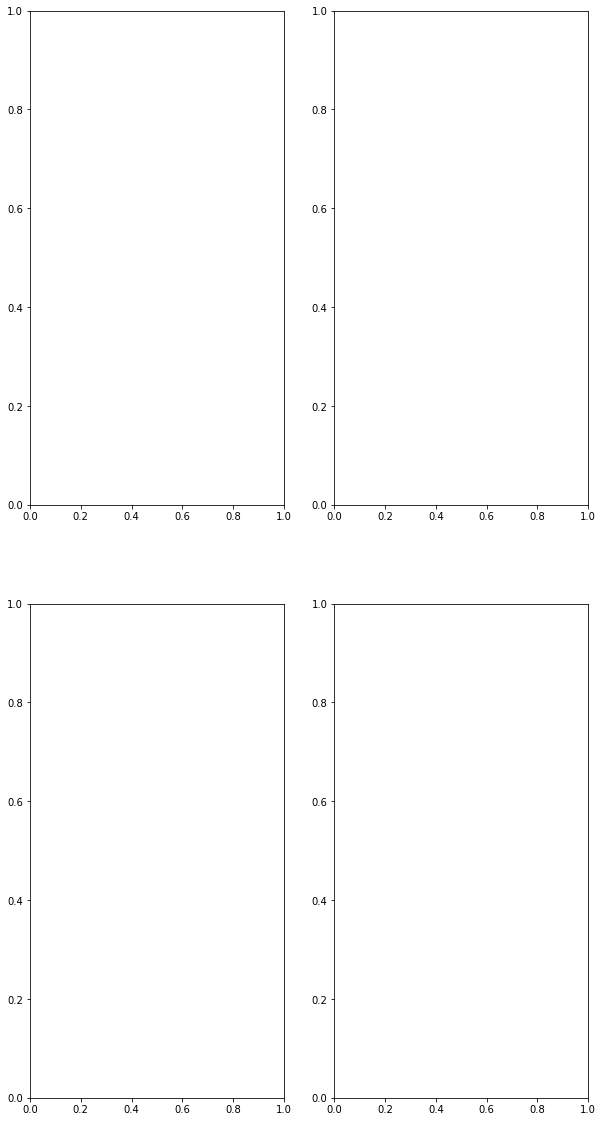

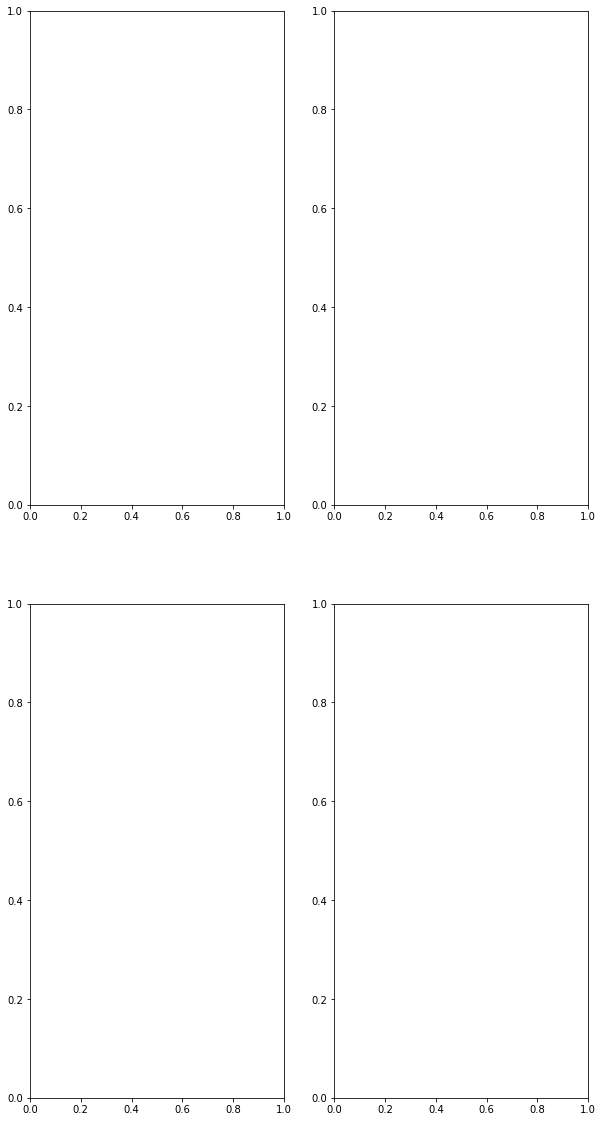

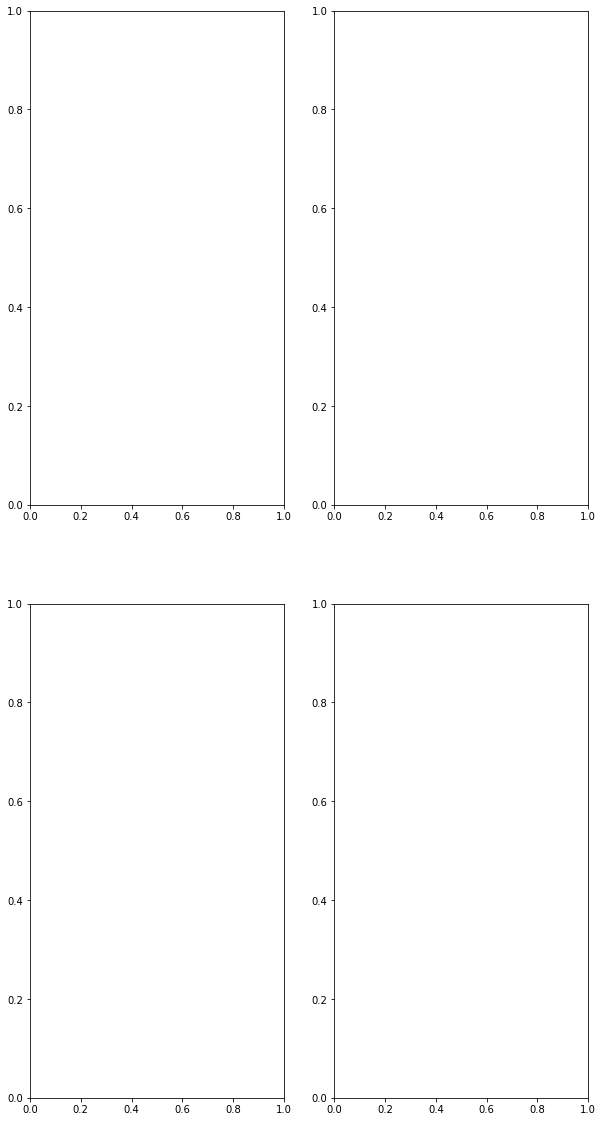

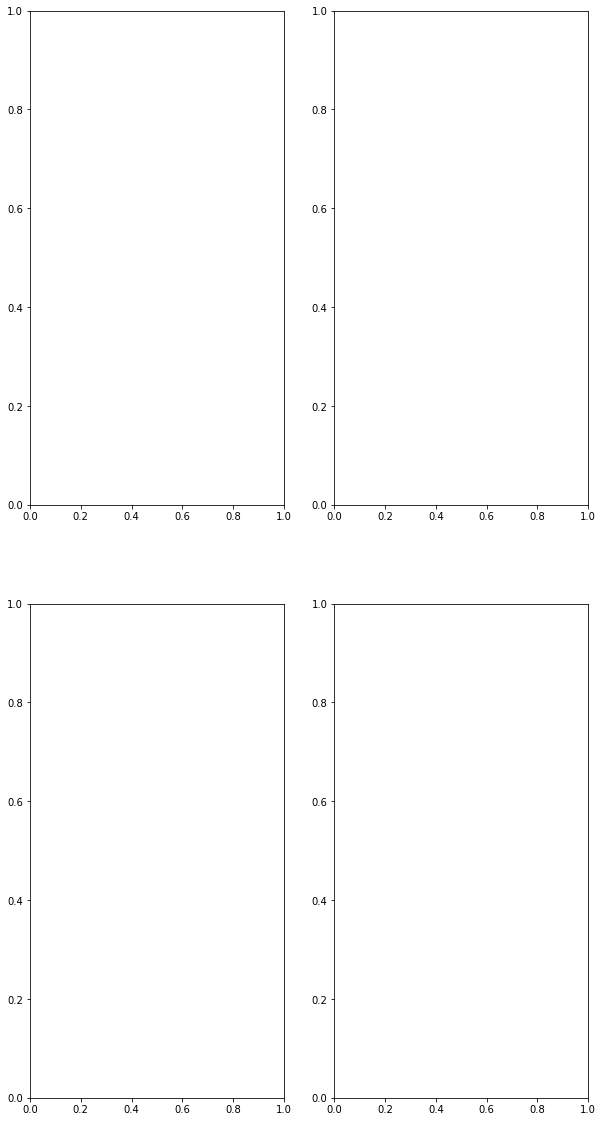

In [25]:
from notebooks.hmm.pred_func import pred_regression_methods
methods = ['lgb','LSTM','VAR','Kernel_RBF']
res_regre = []

for meth in methods:

    _, Val_pred, _ = pred_regression_methods(Data,ret,
                                    N_test=10,
                                    method = meth,
                                    N_val = 10,
                                    pred_meth = 'rolling',
                                    p = 2,
                                    plot=False,
                                    perc_var=True)
    res_regre.append(Val_pred)

In [26]:
print(np.mean(abs(Val_Pred-Data[-N_pred:,:])))
print(Data[-N_pred:,:])
print(Val_Pred)
res_regre.append(Val_Pred)
methods.append('HHM_GGM')

0.5623570291790987
[[ 3.2568 15.48   44.44  ]
 [ 3.2833 15.93   45.07  ]
 [ 3.1953 15.85   44.83  ]
 [ 3.2143 16.23   47.62  ]
 [ 3.2735 15.35   45.88  ]
 [ 3.2458 15.88   46.29  ]
 [ 3.3138 14.67   44.9   ]
 [ 3.3426 14.8    43.58  ]
 [ 3.3024 15.14   43.91  ]
 [ 3.2622 14.76   43.03  ]]
[[ 3.26328067 14.81116731 42.99844517]
 [ 3.25131423 15.48607751 44.4725308 ]
 [ 3.28368639 15.9454389  45.28300751]
 [ 3.19322985 15.86147917 45.00040752]
 [ 3.21690355 16.20892893 47.85826192]
 [ 3.27972839 15.39373076 46.14961104]
 [ 3.2451878  15.88360054 46.15820574]
 [ 3.31057952 14.70940293 45.1593742 ]
 [ 3.34183672 14.84350061 43.35331724]
 [ 3.30157921 15.15652232 43.93914444]]


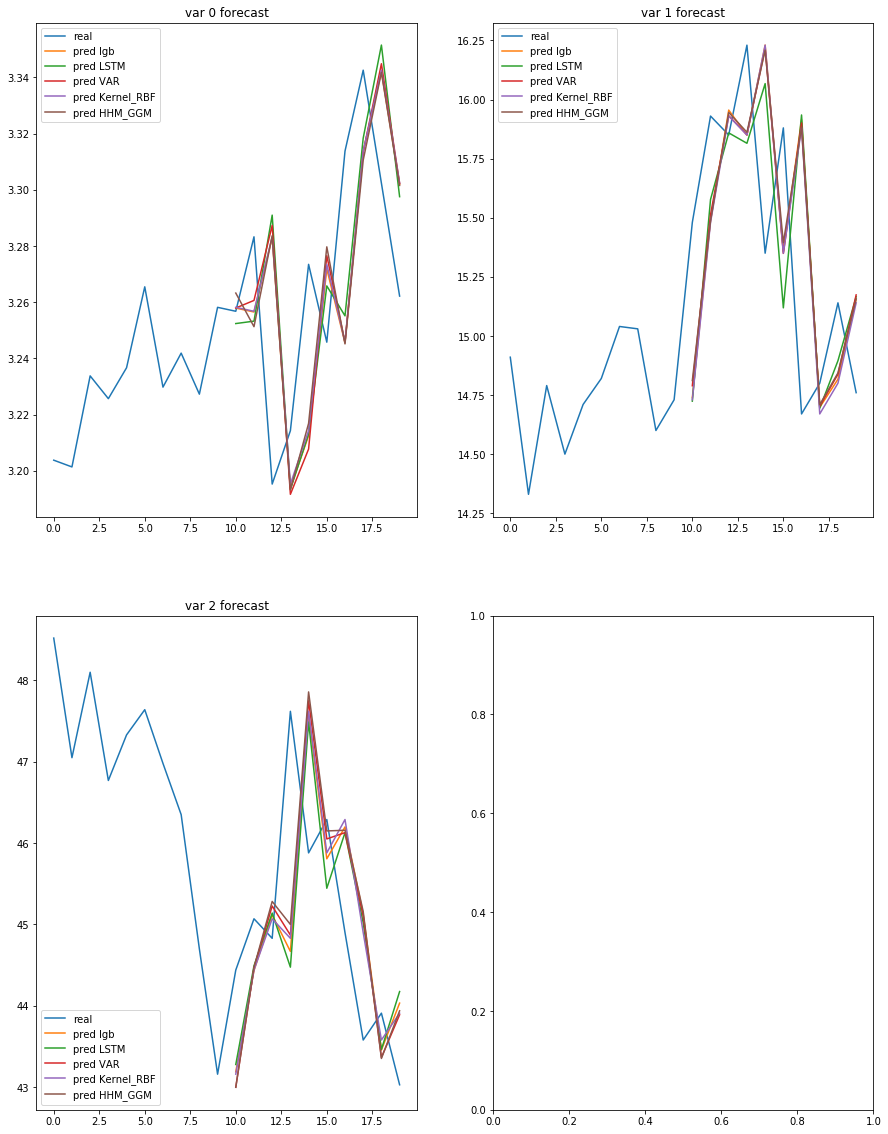

In [27]:
figsizex=15
figsizey=20
N_per_rows=2
N_mem = 10
N_test = N_pred
Dates = None
columns = None
N_TS = np.size(Data, axis=1)


N_rows = int(np.ceil(N_TS / N_per_rows))
f, axes = plt.subplots(N_rows, N_per_rows, figsize=(figsizex, figsizey))
list_all = []
for ts in range(N_TS):
    i = int(ts / N_per_rows)
    j = np.remainder(ts, N_per_rows)
    
    for n,Value_pred in enumerate(res_regre):
        
        absolute_error = abs(Data[-(N_test):,ts]-Value_pred[:,ts])
        MAE = np.mean(absolute_error)
        std = np.std(absolute_error)
        

        if Dates is None:
            x_mem = np.arange(N_mem + N_test)
            x = np.arange(N_mem,N_mem + N_test)
            if n==0:
                axes[i, j].plot(x_mem, Data[-(N_mem+N_test):,ts],label='real')
                #axes[i, j].plot(x, Data[-(N_test):,ts], 'o', label='real')
            axes[i, j].plot(x, Value_pred[:,ts],  label='pred '+str(methods[n]))
            if columns is None:
                axes[i, j].set_title('var ' + str(ts) + ' forecast')
                list_all.append([str(methods[n]),'var ' + str(ts),MAE,std])
            else:
                axes[i, j].set_title(str(columns[ts]) + ' forecast')
                list_all.append([str(methods[n]),str(columns[ts]),MAE,std])

        axes[i, j].legend()

In [28]:
import pandas as pd
df_recap = pd.DataFrame(list_all, columns=['method', 'TS', 'MAE', 'std AB'])

In [29]:
print(df_recap.to_string())

        method     TS       MAE    std AB
0          lgb  var 0  0.039953  0.024294
1         LSTM  var 0  0.039875  0.025206
2          VAR  var 0  0.041489  0.025397
3   Kernel_RBF  var 0  0.039900  0.024180
4      HHM_GGM  var 0  0.041790  0.022474
5          lgb  var 1  0.513676  0.336121
6         LSTM  var 1  0.503270  0.355669
7          VAR  var 1  0.500822  0.333270
8   Kernel_RBF  var 1  0.513000  0.328696
9      HHM_GGM  var 1  0.491913  0.327097
10         lgb  var 2  1.161686  0.755187
11        LSTM  var 2  1.190728  0.766962
12         VAR  var 2  1.145906  0.738603
13  Kernel_RBF  var 2  1.101000  0.742192
14     HHM_GGM  var 2  1.153368  0.731240


In [40]:
df_recap.loc[df_recap['method'] == 'VAR']['MAE'].std()

0.5548060250988099